In [2]:
# import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler

## 0. Read data

In [3]:
df = pd.read_csv('../data/spotify_clean.csv')

In [4]:
df.head()

,Unnamed: 0,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity_class,duration_s
0,0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,Very Low,99.373
1,1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,Very Low,137.373
2,2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,Very Low,170.267
3,3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,Very Low,152.427
4,4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,Very Low,82.625


In [5]:
df = df.drop(columns=['Unnamed: 0'])

In [6]:
df['time_signature'].unique()

array(['4/4', '5/4', '3/4', '1/4', '0/4'], dtype=object)

In [7]:
df['key'].nunique()

12

### 1. Drop the useless columns

In [8]:
df.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence', 'popularity_class', 'duration_s'],
      dtype='object')

In [9]:
df_1 = df.drop(columns=['genre', 'artist_name', 'track_name', 'track_id', 'popularity'])

In [10]:
df_1.columns

Index(['acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence', 'popularity_class', 'duration_s'],
      dtype='object')

### 2. Transform to dummy

In [11]:
df_1.dtypes

acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
popularity_class     object
duration_s          float64
dtype: object

In [12]:
df_1['key'].nunique()

12

In [13]:
df_1['time_signature'].nunique()

5

In [14]:




df_1['mode'].nunique()

2

In [15]:
df_1['popularity_class'].nunique() # variable to predict

5

In [16]:
df_trans = pd.get_dummies(df_1, columns=['key','time_signature', 'mode'])

In [17]:
df_trans

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity_class,...,key_F#,key_G,key_G#,time_signature_0/4,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4,mode_Major,mode_Minor
0,0.61100,0.389,0.910,0.000000,0.3460,-1.828,0.0525,166.969,0.814,Very Low,...,False,False,False,False,False,False,True,False,True,False
1,0.24600,0.590,0.737,0.000000,0.1510,-5.559,0.0868,174.003,0.816,Very Low,...,True,False,False,False,False,False,True,False,False,True
2,0.95200,0.663,0.131,0.000000,0.1030,-13.879,0.0362,99.488,0.368,Very Low,...,False,False,False,False,False,False,False,True,False,True
3,0.70300,0.240,0.326,0.000000,0.0985,-12.178,0.0395,171.758,0.227,Very Low,...,False,False,False,False,False,False,True,False,True,False
4,0.95000,0.331,0.225,0.123000,0.2020,-21.150,0.0456,140.576,0.390,Very Low,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232719,0.00384,0.687,0.714,0.544000,0.0845,-10.626,0.0316,115.542,0.962,Low,...,False,False,False,False,False,False,True,False,True,False
232720,0.03290,0.785,0.683,0.000880,0.2370,-6.944,0.0337,113.830,0.969,Low,...,False,False,False,False,False,False,True,False,False,True
232721,0.90100,0.517,0.419,0.000000,0.0945,-8.282,0.1480,84.135,0.813,Low,...,False,False,False,False,False,False,True,False,True,False
232722,0.26200,0.745,0.704,0.000000,0.3330,-7.137,0.1460,100.031,0.489,Low,...,False,False,False,False,False,False,True,False,True,False


### 3. Perform Train Test Split

In [18]:
features = df_trans.drop(columns=["popularity_class"], axis = 1)
target = df_trans["popularity_class"]

In [19]:
features

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_s,...,key_F#,key_G,key_G#,time_signature_0/4,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4,mode_Major,mode_Minor
0,0.61100,0.389,0.910,0.000000,0.3460,-1.828,0.0525,166.969,0.814,99.373,...,False,False,False,False,False,False,True,False,True,False
1,0.24600,0.590,0.737,0.000000,0.1510,-5.559,0.0868,174.003,0.816,137.373,...,True,False,False,False,False,False,True,False,False,True
2,0.95200,0.663,0.131,0.000000,0.1030,-13.879,0.0362,99.488,0.368,170.267,...,False,False,False,False,False,False,False,True,False,True
3,0.70300,0.240,0.326,0.000000,0.0985,-12.178,0.0395,171.758,0.227,152.427,...,False,False,False,False,False,False,True,False,True,False
4,0.95000,0.331,0.225,0.123000,0.2020,-21.150,0.0456,140.576,0.390,82.625,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232719,0.00384,0.687,0.714,0.544000,0.0845,-10.626,0.0316,115.542,0.962,326.240,...,False,False,False,False,False,False,True,False,True,False
232720,0.03290,0.785,0.683,0.000880,0.2370,-6.944,0.0337,113.830,0.969,282.447,...,False,False,False,False,False,False,True,False,False,True
232721,0.90100,0.517,0.419,0.000000,0.0945,-8.282,0.1480,84.135,0.813,166.960,...,False,False,False,False,False,False,True,False,True,False
232722,0.26200,0.745,0.704,0.000000,0.3330,-7.137,0.1460,100.031,0.489,222.442,...,False,False,False,False,False,False,True,False,True,False


In [20]:
target

0         Very Low
1         Very Low
2         Very Low
3         Very Low
4         Very Low
            ...   
232719         Low
232720         Low
232721         Low
232722         Low
232723         Low
Name: popularity_class, Length: 232724, dtype: object

In [21]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

### Normalization

In [22]:
normalizer = MinMaxScaler()

In [23]:
#Fit to our training data
normalizer.fit(X_train)

MinMaxScaler()

In [24]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [25]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_s,...,key_F#,key_G,key_G#,time_signature_0/4,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4,mode_Major,mode_Minor
0,0.983936,0.297286,0.221205,0.003994,0.113427,0.622373,0.078596,0.222483,0.244,0.039070,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.848394,0.650252,0.326313,0.301301,0.102319,0.738652,0.045609,0.657629,0.510,0.010528,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.877510,0.629868,0.433422,0.000000,0.869740,0.683404,0.975605,0.260902,0.470,0.043059,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.557229,0.620212,0.691685,0.000000,0.088183,0.846871,0.250106,0.243563,0.638,0.036917,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.005070,0.479670,0.926925,0.011512,0.870750,0.829362,0.029593,0.360463,0.232,0.037510,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [26]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_s,...,key_F#,key_G,key_G#,time_signature_0/4,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4,mode_Major,mode_Minor
0,0.007952,0.862676,0.605598,0.269269,0.046278,0.753599,0.128129,0.468018,0.817,0.028306,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.260040,0.818689,0.372360,0.000000,0.079095,0.718350,0.069156,0.372913,0.871,0.034782,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.198795,0.787576,0.575567,0.000006,0.073743,0.716891,0.056428,0.237837,0.847,0.043406,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.960843,0.433537,0.060942,0.000000,0.105349,0.416896,0.061095,0.302592,0.458,0.023618,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.985944,0.333762,0.382370,0.010511,0.317399,0.684739,0.080717,0.355908,0.274,0.055776,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [30]:
#Use KNN predective model as Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)

In [31]:
knn.fit(X_train_norm, y_train)

KNeighborsClassifier(n_neighbors=15)

In [32]:
#Evaluate
knn.score(X_test_norm, y_test)

0.5556128477817166

### 4. Model Selection

#### 4.1 k-NN

In [21]:
number_of_neighbours = 15

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=number_of_neighbours)

In [23]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [24]:
knn.score(X_test, y_test)

0.5132022773659899

In [25]:
#l = []
#for i in range(10,50):
    
    #knn = KNeighborsClassifier(n_neighbors=i)
    #knn.fit(X_train, y_train)
    #r2 = knn.score(X_test, y_test)
    #l.append(r2)
    
    
    #print(f"k = {i}  || R^2 = {r2}")



In [26]:
#plt.plot(list(range(10,50)), l)

In [27]:
l = []
for i in range(3,12):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    r2 = knn.score(X_test, y_test)
    l.append(r2)
    
    
    print(f"k = {i}  || R^2 = {r2}")

k = 3  || R^2 = 0.5613277473412827
k = 4  || R^2 = 0.540917391771404
k = 5  || R^2 = 0.5350306155333548
k = 6  || R^2 = 0.5275539800193362
k = 7  || R^2 = 0.5231926093028252
k = 8  || R^2 = 0.5216027500268557
k = 9  || R^2 = 0.5202921903534214
k = 10  || R^2 = 0.5194757761306262
k = 11  || R^2 = 0.5147921366419594


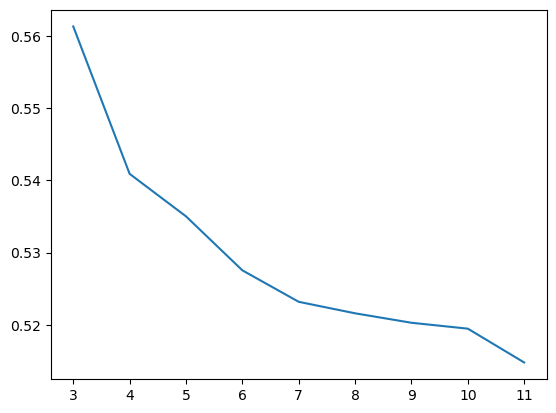

In [28]:
plt.plot(list(range(3,12)), l)

In [29]:
max_precision = max(l)
max_precision
k = l.index(max_precision) + 3
print(f'The correct parameter k is {k}')

The correct parameter k is 3


### 5. ACP

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [35]:
df_numerical = df_1.select_dtypes(include=[np.number])
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_numerical)

In [36]:
# Create PCA
pca = PCA()

# Adjust model and apply to normalized data
pca_result = pca.fit_transform(df_normalized)

[0.34589827 0.16220429 0.11671571 0.09519246 0.07943891 0.06956491
 0.05219755 0.0395777  0.02768374 0.01152646]


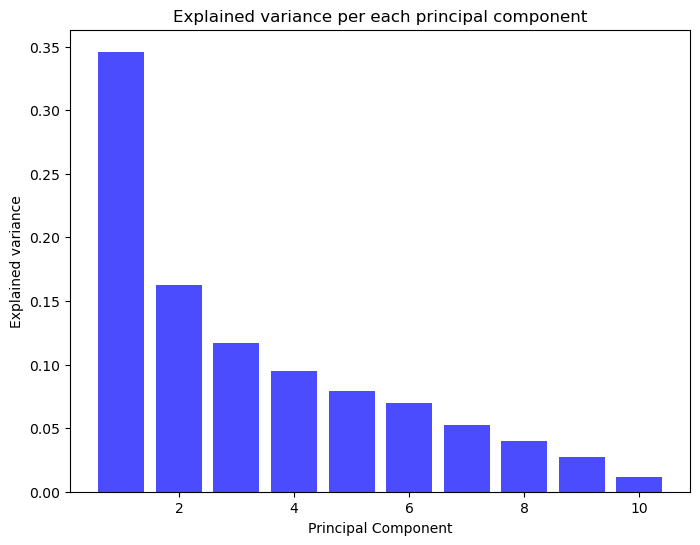

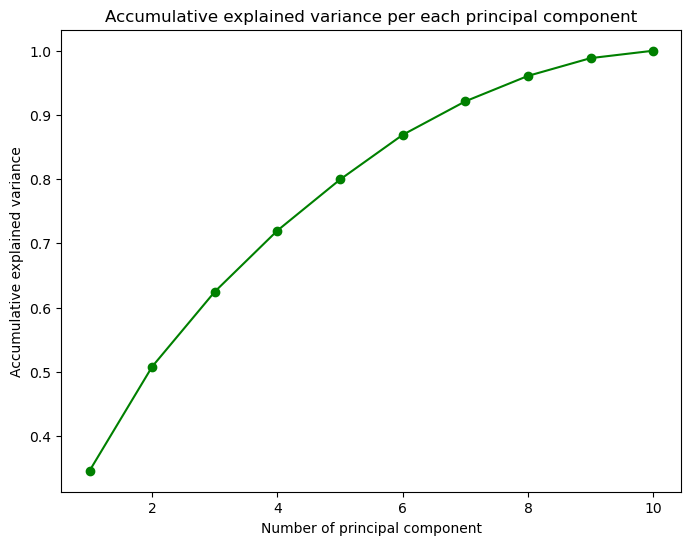

In [37]:
# Visualize the varianze explained per variable
explained_variance = pca.explained_variance_ratio_
print(explained_variance)


plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='blue')
plt.xlabel('Principal Component')
plt.ylabel('Explained variance')
plt.title('Explained variance per each principal component')
plt.show()

# Accumulative percentage:
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='green')
plt.xlabel('Number of principal component')
plt.ylabel('Accumulative explained variance')
plt.title('Accumulative explained variance per each principal component')
plt.show()


In [38]:
pca = PCA(n_components=0.90)  # Mantener componentes que expliquen el 90% de la varianza
pca_result = pca.fit_transform(df_normalized)

print(f'Número de componentes seleccionados: {pca.n_components_}')

Número de componentes seleccionados: 7


In [39]:
# Obtening component information
variable_name = df_numerical.columns

for i, component in enumerate(pca.components_): 
    print(f"\nComponente {i + 1}:") 
    for j, variable in enumerate(variable_name): 
        print(f"{variable}: {component[j]:.4f}")


Componente 1:
acousticness: 0.4203
danceability: -0.3416
energy: -0.4629
instrumentalness: 0.3328
liveness: -0.0544
loudness: -0.4747
speechiness: -0.0535
tempo: -0.1619
valence: -0.3462
duration_s: 0.0663

Componente 2:
acousticness: 0.2261
danceability: 0.0341
energy: 0.0486
instrumentalness: -0.1734
liveness: 0.6417
loudness: -0.0623
speechiness: 0.6760
tempo: -0.2061
valence: -0.0148
duration_s: -0.0019

Componente 3:
acousticness: -0.2255
danceability: -0.4621
energy: 0.2630
instrumentalness: 0.0870
liveness: 0.2284
loudness: 0.1619
speechiness: -0.0097
tempo: 0.3173
valence: -0.3795
duration_s: 0.5794

Componente 4:
acousticness: -0.0606
danceability: 0.2637
energy: -0.0242
instrumentalness: -0.0471
liveness: -0.1446
loudness: 0.0418
speechiness: -0.0639
tempo: -0.6725
valence: 0.0701
duration_s: 0.6634

Componente 5:
acousticness: 0.2645
danceability: 0.2964
energy: -0.2332
instrumentalness: -0.0441
liveness: -0.0716
loudness: -0.2075
speechiness: 0.1415
tempo: 0.5935
valence: 

- Apply a ML Model: **Logistic Regression**

In [40]:
X = pca_result
X
y = df_1['popularity_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Model: Logistic Regression

from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression(max_iter=1000)

# Adjust the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.5300461918573424
Classification Report:


c:\Users\celia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\celia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\celia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

        High       0.00      0.00      0.00       624
         Low       0.53      0.66      0.59     21388
      Medium       0.50      0.52      0.51     15285
         Top       0.00      0.00      0.00        25
    Very Low       0.66      0.29      0.40      9223

    accuracy                           0.53     46545
   macro avg       0.34      0.29      0.30     46545
weighted avg       0.54      0.53      0.52     46545

Confusion Matrix:
[[    0   161   459     0     4]
 [    0 14087  6072     0  1229]
 [    0  7222  7914     0   149]
 [    0     4    21     0     0]
 [    0  5298  1255     0  2670]]


- Apply other ML Model: **Random Forest**

In [43]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)


model_rf.fit(X_train, y_train)


y_pred_rf = model_rf.predict(X_test)


accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy Random Forest: {accuracy_rf}")
print("Classification Report Random Forest:")
print(classification_report(y_test, y_pred_rf))


Accuracy Random Forest: 0.7217101729509077
Classification Report Random Forest:
              precision    recall  f1-score   support

        High       0.97      0.74      0.84       624
         Low       0.68      0.80      0.74     21388
      Medium       0.78      0.79      0.79     15285
         Top       0.89      0.68      0.77        25
    Very Low       0.70      0.44      0.54      9223

    accuracy                           0.72     46545
   macro avg       0.81      0.69      0.73     46545
weighted avg       0.72      0.72      0.71     46545



In [30]:
pip install  xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
    --------------------------------------- 2.4/124.9 MB 12.2 MB/s eta 0:00:11
   - -------------------------------------- 5.0/124.9 MB 12.5 MB/s eta 0:00:10
   -- ------------------------------------- 7.9/124.9 MB 12.8 MB/s eta 0:00:10
   --- ------------------------------------ 10.7/124.9 MB 13.0 MB/s eta 0:00:09
   ---- ----------------------------------- 13.6/124.9 MB 13.1 MB/s eta 0:00:09
   ----- ---------------------------------- 16.5/124.9 MB 13.2 MB/s eta 0:00:09
   ------ --------------------------------- 19.4/124.9 MB 13.2 MB/s eta 0:00:08
   ------- -------------------------------- 22.5/124.9 MB 13.3 MB/s eta 0:00:08
   -------- ------------------------------- 25.2/124.9 MB 13.4 MB/s eta 0:00:08
   -------- ------------------------------- 28.0/124.9 MB 13.4 MB/s eta 0:00:08
   --------- ------------------------------ 31.2/124.9 MB 13.5 MB/s eta 0:00:07
   ---------- ----------------------------- 34.1/124

In [31]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Definir el modelo base
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    "max_depth": [3, 4, 5],        # Profundidad máxima del árbol
    "learning_rate": [0.01, 0.1, 0.3],  # Tasa de aprendizaje
    "n_estimators": [50, 100, 200],     # Número de árboles
    "subsample": [0.8, 1.0],       # Proporción de datos usados por árbol
    "colsample_bytree": [0.8, 1.0],  # Proporción de características usadas por árbol
    "gamma": [0, 0.1, 0.2],        # Reducción mínima en la pérdida para dividir un nodo
}

# Configurar el GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring="accuracy",          # Métrica de evaluación
    cv=3,                        # Validación cruzada (3 particiones)
    verbose=1,                   # Mostrar el progreso
    n_jobs=-1                    # Usar todos los núcleos disponibles
)

# Ajustar el GridSearchCV con los datos
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y el mejor resultado
print("Mejores Hiperparámetros:")
print(grid_search.best_params_)
print("\nMejor Precisión (Accuracy):")
print(grid_search.best_score_)


c:\Users\Carlota\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

Do cross validation

In [45]:
from sklearn.model_selection import cross_val_score

# Cross validation
cv_scores = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='accuracy')

# Print results
print("Puntajes de validación cruzada:", cv_scores)
print("Precisión promedio (validación cruzada):", cv_scores.mean())

Puntajes de validación cruzada: [0.6975239  0.69604684 0.7000752  0.69975293 0.70087283]
Precisión promedio (validación cruzada): 0.6988543392031084


In [47]:
from sklearn.model_selection import  cross_val_predict

# Print cross-validation scores
print("\nCross-Validation Scores:", cv_scores)
print("Mean Accuracy (Cross-Validation):", cv_scores.mean())

# Get predictions during cross-validation
y_pred_cv = cross_val_predict(model_rf, X_train, y_train, cv=5)

# Evaluate the predictions made during cross-validation
accuracy_cv = accuracy_score(y_train, y_pred_cv)
print(f"\nAccuracy (Cross-Validation) Random Forest: {accuracy_cv}")
print("Classification Report (Cross-Validation) Random Forest:")
print(classification_report(y_train, y_pred_cv))


Cross-Validation Scores: [0.6975239  0.69604684 0.7000752  0.69975293 0.70087283]
Mean Accuracy (Cross-Validation): 0.6988543392031084

Accuracy (Cross-Validation) Random Forest: 0.6988543283614156
Classification Report (Cross-Validation) Random Forest:
              precision    recall  f1-score   support

        High       0.95      0.65      0.77      2225
         Low       0.67      0.78      0.72     85857
      Medium       0.75      0.75      0.75     61361
         Top       0.98      0.56      0.71        82
    Very Low       0.69      0.44      0.54     36654

    accuracy                           0.70    186179
   macro avg       0.81      0.64      0.70    186179
weighted avg       0.70      0.70      0.69    186179



In [48]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate the model with the best parameters on the test set
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
print(f"Accuracy (Test Set) after Hyperparameter Tuning: {accuracy_score(y_test, y_pred_best)}")
print("Classification Report (Test Set) after Hyperparameter Tuning:")
print(classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: 0.7007073941635007
Accuracy (Test Set) after Hyperparameter Tuning: 0.7233215168116877
Classification Report (Test Set) after Hyperparameter Tuning:
              precision    recall  f1-score   support

        High       0.97      0.74      0.84       624
         Low       0.68      0.80      0.74     21388
      Medium       0.79      0.78      0.79     15285
         Top       0.89      0.68      0.77        25
    Very Low       0.70      0.44      0.54      9223

    accuracy                           0.72     46545
   macro avg       0.81      0.69      0.74     46545
weighted avg       0.73      0.72      0.72     46545



 Improve the hyperparameters: 

In [43]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

In [44]:


# Definir los hiperparámetros a probar (en este caso, probamos rangos o distribuciones)
#param_dist = {
    #'n_estimators': randint(50, 200),  # Rango para el número de árboles
    #'max_depth': [None, 10, 20, 30, 40, 50],  # Profundidad de los árboles
    #'min_samples_split': randint(2, 10),  # Número mínimo de muestras para dividir
    #'min_samples_leaf': randint(1, 4),  # Número mínimo de muestras en una hoja
    #'max_features': ['auto', 'sqrt', 'log2'],  # Número de características a considerar
    #'bootstrap': [True, False]  # Si se usa muestreo con reemplazo
#}

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2', None],  # Replace 'auto' with valid values
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 6, 10],
    'n_estimators': [100, 110, 120]
}

# Crear el clasificador RandomForest
rf = RandomForestClassifier(random_state=42)

# Realizar la búsqueda de hiperparámetros con validación cruzada
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=100, cv=5, verbose=3, random_state=42, n_jobs=-1)

# Ajustar el modelo a los datos de entrenamiento
random_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)

# Evaluar el modelo con los mejores hiperparámetros
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluar rendimiento
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\celia\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
215 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\celia\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\celia\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\celia\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\celia\anaconda3\Lib\site-package

Mejores hiperparámetros: {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 110}
Accuracy: 0.7244601998066388
              precision    recall  f1-score   support

        High       0.97      0.73      0.84       624
         Low       0.68      0.81      0.74     21388
      Medium       0.81      0.76      0.79     15285
         Top       0.89      0.68      0.77        25
    Very Low       0.69      0.45      0.54      9223

    accuracy                           0.72     46545
   macro avg       0.81      0.69      0.74     46545
weighted avg       0.73      0.72      0.72     46545

